# Get Down with Gradient Descent

- toc: false
- badges: true
- comments: false
- hide: false
- image: images/gd_dancing_stick_people.png

![](nb_images/gd_dancing_stick_people.png "")

Ahh, gradient descent. It's probably one of the most widely used techniques in  data science today. But rather than standing out in the limelight, gradient descent plays more of a behind-the-scenes role,  providing the hidden machinery that make some of our favorite ML algorithms go. Understanding how it works will give us insight into how model training actually works and how seemingly profound differences in models are really only skin deep. In this post we'll get the intuition for the gradient descent procedure with a fresh analogy, develop  the mathematical formulation, and use it to train ourselves a linear regression model.

## Intuition

Gradient descent is a numerical optimization method that helps us find the inputs that yield the minimum value of a function. 
Since most explanations of this algorithm seem to use a story about hikers being lost in the mountains, we're going to try out a new analogy.

Let's say you're at a concert. Remember those? They're these things that used to happen where people played music and everyone danced and had a great time. Now suppose at this concert there's a dance floor which has become a bit sweltering from copious amounts of "getting down". But the temperature isn't quite uniform; maybe there's a cool spot from a ceiling fan somewhere. 

![](nb_images/gd_dance_floor.png "")

Let's get ourselves to that cool spot using the following procedure.

1. From our current position, figure out which direction feels coolest.
1. Take a step (with lots of swagger) in that direction.
1. Repeat steps 1 and 2 until we reach the coolest spot on the dance floor.

The crux of this procedure is figuring out, at each step,  which direction yields the greatest temperature reduction.
Our skin is pretty sensitive to temperature, so we can just use awareness of body sensation to sense which direction feels coolest.
Luckily, we have a mathematical equivalent to our skin's ability to sense local variation in temperature.


### Step 1: determine which way to go
Let $f(x,y)$ be the temperature on the dance floor at position $(x,y)$.
The direction of fastest decrease in temperature is going to be given by some vector in our $(x,y)$ space, e.g., 

[vector component in $x$ direction, vector component in $y$ direction]

Turns out that the gradient of a function evaluated at a particular location  yields a vector that points in the direction of fastest *increase* in the function, pretty similar to what we'relooking for.
The gradient of $f(x,y)$ is given by

$$ \nabla f(x,y) = \left [ \frac{\partial f(x,y)}{\partial x}, \frac{\partial f(x,y)}{\partial y} \right ] $$

The components of the gradient vector are the partial derivatives of our function $f(x,y)$, evaluated at the point $(x,y)$.
These partial derivatives just tell us the slope of $f(x,y)$ in the $x$ and $y$ directions respectively.
The intuition is that if $\frac{\partial f(x,y)}{\partial x}$ is a large positive number, then moving in the positive $x$ direction will make $f(x,y)$ increase a lot, whereas if $\frac{\partial f(x,y)}{\partial x}$ is a large negative number, then moving in the *negative* $x$ direction will make $f(x,y)$ increase a lot.

It's not too hard to see that the direction of fastest decrease is actually just the exact opposite direction from that of fastest increase.
Since we can point a vector in the opposite direction by negating its component values, our direction of fastest temperature decrease will be given by the negative gradient of the temperature field $-\nabla f(x,y)$.


![](nb_images/gd_local_change.png "")

### Step 2: take a step in the right direction
Now that we have our direction vector, we're ready to take a step toward the cool part of the dance floor. 
To do this, we'll just add our direction vector to our current position. The update rule would look like this.

$$ [x_\text{next}, y_\text{next}] = [x_\text{prev}, y_\text{prev}] - \nabla f (x_\text{prev}, y_\text{prev}) = [x_\text{prev}, y_\text{prev}] -  \left [ \frac{\partial f (x_\text{prev}, y_\text{prev})}{\partial x}, \frac{\partial f (x_\text{prev}, y_\text{prev})}{\partial y} \right ] $$ 

If we iteratively apply this update rule, we'll end up tracing a trajectory through the $(x,y)$ space on the dance floor and we'll eventually end up at the coolest spot!


![](nb_images/gd_trajectory.png "")

## Training a Linear Regression Model with Gradient Descent
Let's talk about [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) regression, a.k.a. *linear regression*.
In this problem, we have numerical feature $x$ and numerical target $y$. We want to find a model of the form

$$F(x) = \alpha + \beta x$$

"Training" the model means finding the particular values of $\alpha$ and $\beta$ that fit our dataset best according to a mean squared error loss function.

$$L(y, F(x)) =  \frac{1}{n} \sum_{i=1}^{n} (y_i - F(x_i))^2  =  \frac{1}{n} \sum_{i=1}^{n} (y_i - (\alpha + \beta x_i))^2 $$

The loss function $L$ takes four arguments: $x$, $y$, $\alpha$, and $\beta$. But since $x$ and $y$ are fixed given our dataset, we could write the loss as $L(\alpha, \beta | x, y)$ to emphasize that $\alpha$ and $\beta$ are the only free parameters. So we're looking for the following.

$$\underset{\alpha,\beta}{\operatorname{argmin}}  L(\alpha,\beta|x,y) $$

To solve this with gradient descent, we use the following update rule.

$$[\alpha_{t+1}, \beta_{t+1}] = [\alpha_{t}, \beta_{t}] - \eta \nabla L(\alpha_t, \beta_t | x, y) =  \left [\alpha_t - \eta \frac{\partial L(\alpha_t, \beta_t)}{\partial \alpha}, \beta_t - \eta \frac{\partial L(\alpha_t, \beta_t)}{\partial \beta} \right] $$

To get the gradient $\nabla L(\alpha,\beta|x,y)$, we need the partial derivatives of $L$ with respect to $\alpha$ and $\beta$. Since $L$ is just a big sum, it's easy to calculate the derivatives.

$$ \frac{\partial L(\alpha, \beta)}{\partial \alpha} = \frac{1}{n} \sum_{i=1}^{n} -2 (y_i - (\alpha + \beta x_i)) $$
$$ \frac{\partial L(\alpha, \beta)}{\partial \beta} = \frac{1}{n} \sum_{i=1}^{n} -2x_i (y_i - (\alpha + \beta x_i)) $$

Great! We've got everything we need to train an ordinary least squares model using gradient descent.

In [1]:
#hide
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np 

alpha_true, beta_true = -10, 2
rng = np.random.default_rng()
x = np.linspace(0, 10, 50)
y = alpha_true + beta_true*x + rng.normal(0, 1, size=x.shape)

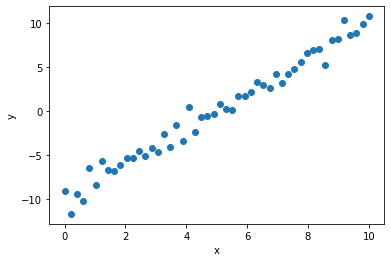

In [3]:
#hide_input
plt.scatter(x,y, label='y')
plt.xlabel('x')
plt.ylabel('y');
# plt.legend();

Our implementation will use a function to compute the two components of the gradient. At each iteration, we get the partial derivatives from our gradient function, and we update our values of $\alpha$ and $\beta$.

In [4]:
def gradient_of_loss(alpha, beta, x, y):
    partial_alpha = np.mean(-2*(y - (alpha + beta*x)))
    partial_beta = np.mean(-2*x*(y - (alpha + beta*x)))
    return partial_alpha, partial_beta

learning_rate = 0.02
alpha, beta = 0.0, 0.0 # initial values of alpha and beta

for _ in range(500):
    partial_alpha, partial_beta = gradient_of_loss(alpha, beta, x, y)
    alpha -= learning_rate * partial_alpha
    beta -= learning_rate * partial_beta
    
alpha, beta

(-9.858487187322515, 1.9926698560986076)

These estimates of $\alpha$ and $\beta$ result in the model plotted below.

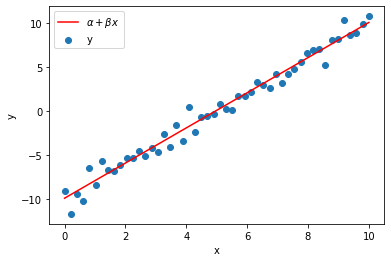

In [5]:
#hide_input
plt.scatter(x,y, label='y')
plt.plot([min(x), max(x)], [alpha + beta*min(x), alpha + beta*max(x)], '-r', label='$\\alpha+\\beta x$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [6]:
#hide
def loss(alpha, beta, x, y):
    return np.mean((y - (alpha + beta*x))**2)

def gradient_descent(alpha, beta, x, y, learning_rate):
    partial_derivative_alpha = np.mean(-2*(y - (alpha + beta*x)))
    partial_derivative_beta = np.mean(-2*x*(y - (alpha + beta*x)))
    alpha_next = alpha - learning_rate * partial_derivative_alpha
    beta_next = beta - learning_rate * partial_derivative_beta
    return alpha_next, beta_next

alphas = []
betas = []
losses = []
alpha, beta = 0.0, 0.0 # initial values of alpha and beta
for _ in range(500):
    losses.append(loss(alpha, beta, x, y))
    alphas.append(alpha)
    betas.append(beta)
    alpha, beta = gradient_descent(alpha, beta, x, y, learning_rate=0.02)

We can see the loss function decreasing throughout the 500 iterations.

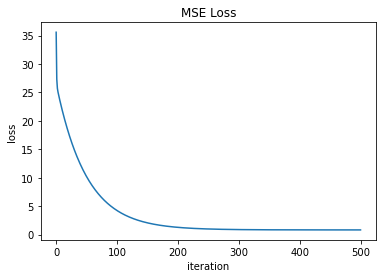

In [7]:
#hide_input
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('MSE Loss');

And we can visualize the loss function as a contour plot over $(\alpha,\beta)$ space. 
The blue points show the trajectory our gradient descent followed from the initial position to the final values of $(\alpha, \beta)$ indicated in red.

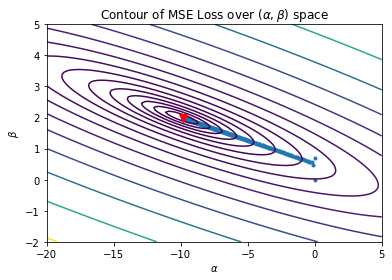

In [8]:
#hide_input
alpha_grid = np.linspace(-20, 5, 100)
beta_grid = np.linspace(-2, 5, 100)
loss_grid = np.zeros((len(alpha_grid), len(beta_grid)))

for i in range(len(alpha_grid)):
    for j in range(len(beta_grid)):
        loss_grid[j,i] = loss(alpha_grid[i], beta_grid[j], x, y)
        
plt.contour(alpha_grid, beta_grid, loss_grid, levels = np.logspace(-2,3,25))
# plt.contour(alpha_grid, beta_grid, loss_grid, levels = [1, 5, 10, 20, 30])
plt.xlabel('$\\alpha$'); plt.ylabel("$\\beta$")
plt.title('Contour of MSE Loss over $(\\alpha, \\beta)$ space');
# plt.scatter(alphas, betas, c=range(len(alphas)),  cmap='viridis', alpha=1, marker='.');
plt.scatter(alphas, betas, marker='.');
plt.plot(alpha, beta, 'rv', markersize=8);

## Wrapping Up

There you have it, gradient descent explained with a fresh new analogy, plus an implemented example solving an ordinary least squares model.
While we often see gradient descent used to train models by performing an optimization in parameter space, as in linear regression and neural networks, there are other ways to use this powerful technique to train models. 
Turns out we can even use it to train some of the more nonparametric models, including our beloved gradient boosted trees. More on that mind-bender in a future post!
